In [1]:
#!pip install factor-analyzer

In [2]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

import random
seed = 0
np.random.seed(seed)
random.seed(seed)

In [3]:
# load the data
df = pd.read_excel('service_quality_data.xls')
data = df.iloc[:,3:]

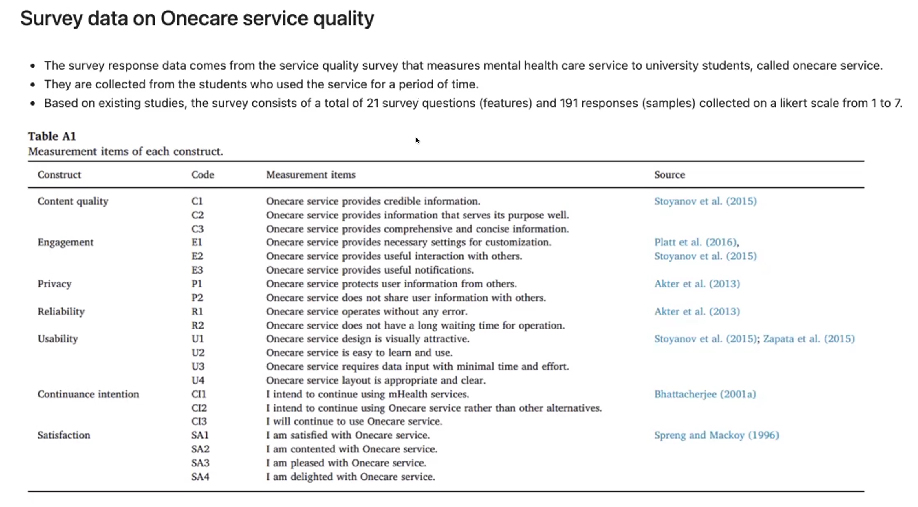

In [4]:
data

,C1,C2,C3,E1,E2,E3,P1,P2,R1,R2,...,U2,U3,U4,CI1,CI2,CI3,SA1,SA2,SA3,SA4
0,4,5,4,3,1,5,5,5,4,3,...,4,4,5,3,3,3,3,3,4,4
1,5,5,5,4,1,5,5,5,5,5,...,5,6,5,3,3,3,5,5,4,4
2,6,6,4,5,1,6,7,4,2,7,...,7,5,5,5,5,5,6,5,4,6
3,5,4,5,5,6,5,5,5,4,3,...,5,4,6,6,4,5,4,5,5,5
4,6,5,5,6,5,6,6,6,4,5,...,6,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
187,6,4,3,4,3,4,1,1,6,3,...,3,5,2,3,4,4,5,5,5,5
188,7,7,7,7,4,7,7,7,6,7,...,7,7,7,7,7,7,6,7,6,6
189,3,2,2,2,3,5,6,6,2,2,...,4,6,4,2,2,2,3,3,3,3


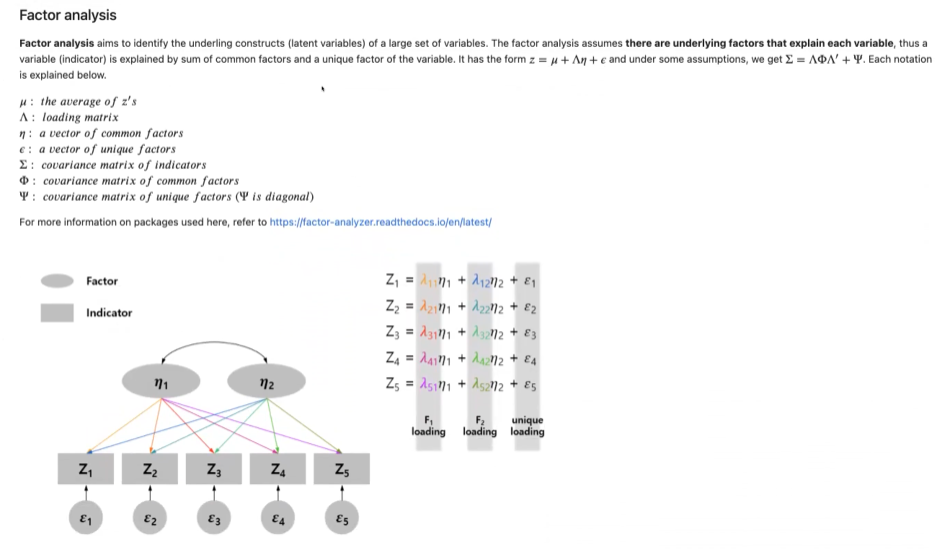

In [5]:
# check whether the dataset is factorable
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# if p-value is smaller than 0.05, the covariance matrix of data is different from the identity matrix, so it is factorable.
statistics, pval = calculate_bartlett_sphericity(data)
print(statistics, pval)

2616.4160625415466 0.0


In [6]:
# determine the number of factors
corr = data.corr()
eigenvals, eigvecs = np.linalg.eig(corr)
# generally pick the number of factors as the number of eigenvalues greater than 1
print(eigenvals)

[9.60110554 1.95927819 1.28021902 1.01312984 0.85362254 0.75774534
 0.69493259 0.65447492 0.61278162 0.57868899 0.45281244 0.42643216
 0.11088458 0.12746332 0.367819   0.18383901 0.20635055 0.32311343
 0.24210898 0.26219707 0.29100088]


In [7]:
n_factors = 5
rotation = None
method = 'ml' # maximum likelihood

fa = FactorAnalyzer(n_factors = n_factors, method = method, rotation = rotation)
fa.fit(data)

FactorAnalyzer(method='ml', n_factors=5, rotation=None, rotation_kwargs={})

In [8]:
# factor loadings (weights of latent factors on each feature)
pd.DataFrame(fa.loadings_, index = data.columns, columns = [f'factor_{i+1}' for i in range(n_factors)])

,factor_1,factor_2,factor_3,factor_4,factor_5
C1,0.533495,0.361224,0.196664,0.180136,-0.223284
C2,0.516584,0.430616,0.088245,0.298084,-0.108143
C3,0.445448,0.515994,0.018387,0.439055,-0.339634
E1,0.479218,0.434275,0.139571,0.054333,0.239959
E2,0.387604,0.349700,0.154680,0.061655,0.101617
E3,0.379060,0.447120,0.290985,0.017344,0.234739
P1,0.266544,0.779838,-0.392110,-0.140954,0.024950
P2,0.251924,0.781213,-0.445686,-0.156010,-0.023544
R1,0.995111,-0.065606,-0.020668,-0.004792,-0.000050
R2,0.586472,0.169460,0.010163,0.060741,0.015438


In [9]:
# show highest loadings of each feature on latent factors
def graph(loadings, n_factors):
    arr = np.zeros_like(loadings)
    arr[np.arange(len(loadings)), loadings.argmax(1)] = loadings.max(1)
    arr[arr == 0] = np.nan
    labels = arr
    plt.figure(figsize = (6,8))
    sns.heatmap(arr, annot = labels, cmap = 'Blues')
    plt.xticks(np.arange(n_factors) + 0.5, [f'factor_{i + 1}' for i in range(n_factors)])
    plt.yticks(np.arange(len(data.columns)) + 0.5, data.columns, rotation = 0)
    plt.show()

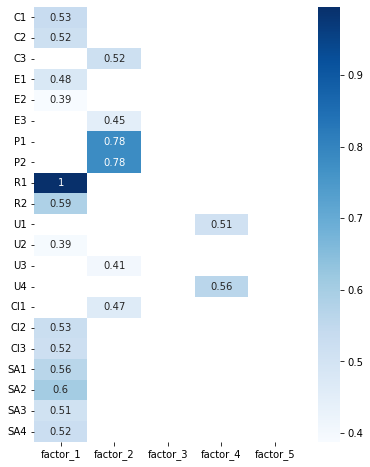

In [10]:
graph(fa.loadings_, n_factors)

**We can see that the first two latent factors end up being highly correlated with all other observed factors, while other latent vectors seem to be irrelevant. But, interpreting only two factors which encompass almost all of the observed variables might not very effective. So we will try to apply rotation to get better interpretation.** 

In [11]:
# rotation of loading matrix for interpretation
rotation = 'varimax'
fa = FactorAnalyzer(n_factors = n_factors, method = method, rotation = rotation)
fa.fit(data)
pd.DataFrame(fa.loadings_, index = data.columns, columns = [f'factor_{i+1}' for i in range(n_factors)])

,factor_1,factor_2,factor_3,factor_4,factor_5
C1,0.432687,0.241135,0.106314,0.266498,0.456501
C2,0.358827,0.417822,0.174287,0.241374,0.410677
C3,0.250231,0.431059,0.231563,0.150111,0.669739
E1,0.500171,0.391212,0.215848,0.219950,0.008481
E2,0.417495,0.280144,0.144911,0.165587,0.096845
E3,0.589240,0.330345,0.138188,0.090746,-0.003976
P1,0.226900,0.248634,0.850849,0.066690,0.108346
P2,0.181487,0.214991,0.891395,0.069146,0.136985
R1,0.330813,0.184118,0.029299,0.909871,0.151461
R2,0.291985,0.231558,0.124935,0.446381,0.151522


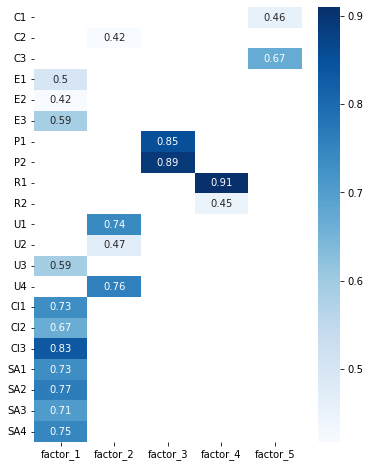

In [12]:
# show highest loadings of each feature on latent factors
graph(fa.loadings_, n_factors)

## Interpretation
**We can observe the following**:
* factor 1 has high loadings with E1-E3, CI1-CI3, and SA1-SA4
* factor 2 has high loadings with U1,U2, and U4
* factor 3 has high loadings with P1 and P2
* factor 4 has high loadings with R1 and R2
* factor 5 has high loadings with C1 and C3

(C: content quality, E: engagement, P: privacy, CI: continuance intention, U: usability, SA: satisfaction)

So, based on that observation, we can say that
* factor 1 indicates **general satisfaction**
* factor 2 indicates **usability**
* factor 3 indicates **privacy**
* factor 4 indicates **reliability**
* factor 5 indicates **cotent quality**

We can see that the meaning of those factors is close to that of pre-defined quality dimensions.

## Principal Component Analysis (PCA)

**PCA** aims at finding factors (components) that account for maximum variance of the dataset and are orthogonal.
    Compared to factor analysis, PCA represents each component as linear combination of given features (direction reversed)

In [13]:
from sklearn.decomposition import PCA
data_centered = data - data.mean()
n_components = len(data.columns) # initially, the number of components is equal to the number of features
pca = PCA(n_components=n_components) 
pca.fit(data_centered)
var_ratio = pca.explained_variance_ratio_
cumvar_ratio = np.cumsum(var_ratio)

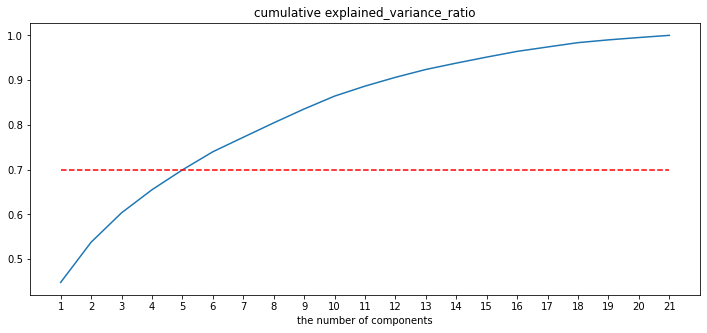

In [14]:
plt.figure(figsize = (12,5))
plt.plot(cumvar_ratio)
plt.title('cumulative explained_variance_ratio')
plt.hlines(0.7, xmin = 0, xmax = len(data.columns) - 1, color = 'r', linestyles = '--')
plt.xticks(np.arange(n_components), np.arange(n_components) + 1)
plt.xlabel('the number of components')
plt.show()

In [15]:
# choose the number of components based on explained_variance_ratio
n_components = 5
pca = PCA(n_components = n_components)
pca.fit(data_centered)
loadings = pca.components_
data_transform = pca.transform(data)


In [17]:
pd.DataFrame(loadings, index = [f'factor_{i + 1}' for i in range(n_components)], columns=data.columns)

,C1,C2,C3,E1,E2,E3,P1,P2,R1,R2,...,U2,U3,U4,CI1,CI2,CI3,SA1,SA2,SA3,SA4
factor_1,-0.219872,-0.218844,-0.190350,-0.245170,-0.225614,-0.246351,-0.172427,-0.166425,-0.257011,-0.201714,...,-0.192969,-0.217233,-0.175086,-0.234769,-0.241989,-0.267116,-0.236198,-0.254456,-0.199554,-0.192079
factor_2,0.006820,-0.145297,-0.215492,-0.041779,-0.014174,0.077707,-0.292676,-0.306271,0.054622,-0.047796,...,-0.209527,0.160179,-0.427693,0.301222,0.138322,0.294303,0.142850,0.214221,0.141822,0.126036
factor_3,0.157179,0.105161,0.054214,-0.101404,-0.170222,-0.277728,-0.324587,-0.341722,0.555585,0.443676,...,0.034766,-0.045825,0.177501,-0.223638,0.029329,-0.155691,0.033392,0.052107,-0.014884,-0.028668
factor_4,0.141631,0.068472,0.090981,-0.208723,-0.417636,-0.379948,0.423572,0.429096,0.037096,0.241695,...,-0.265926,0.004550,-0.200519,0.113925,-0.015310,0.083422,-0.003689,0.051152,0.121859,0.046088
factor_5,0.072986,0.077422,0.099710,-0.155539,-0.719923,0.087471,-0.120489,-0.178293,-0.251976,-0.262953,...,0.288766,0.135081,0.185473,0.064712,0.214344,0.053815,0.170966,0.031282,0.048792,0.043127


In [18]:
pca.explained_variance_ratio_

array([0.4478492 , 0.08983491, 0.06567488, 0.05158051, 0.04441265])

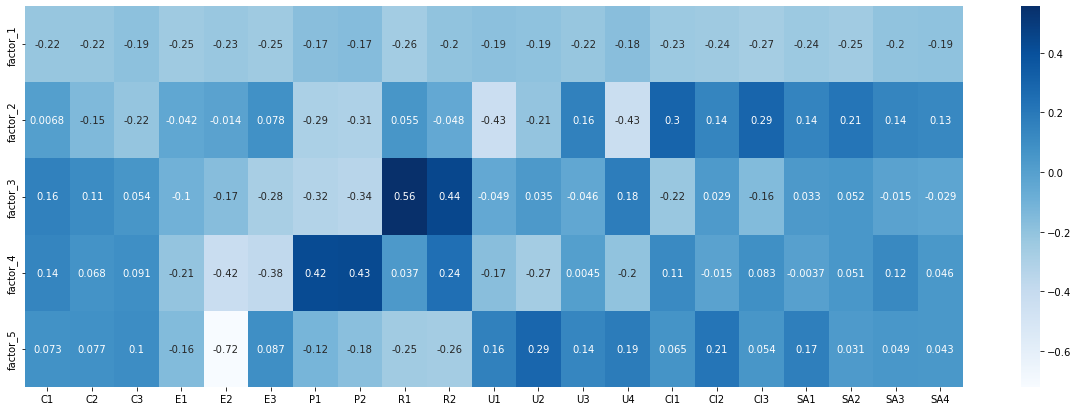

In [19]:
labels = loadings
plt.figure(figsize= (21,7))
sns.heatmap(loadings, annot=labels, cmap ='Blues')
plt.xticks(np.arange(len(data.columns)) + 0.5, data.columns, rotation = 0)
plt.yticks(np.arange(n_components) + 0.5, [f'factor_{i + 1}' for i in range(n_components)])
plt.show()

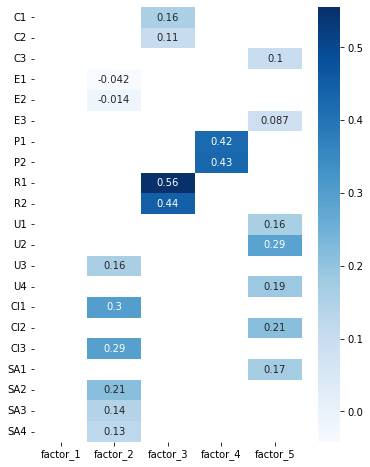

In [20]:
graph(loadings.T, n_components)

**We can see that PCA produces completely different factors, which also have have a different interpretation. Factor_1 represents the direction of highest variance. Factor_2 represent the direction of the second highest variance, and so on.**

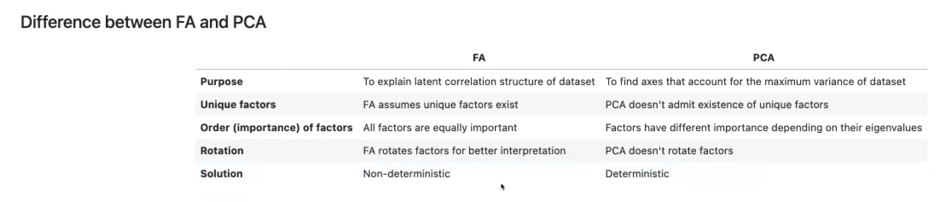

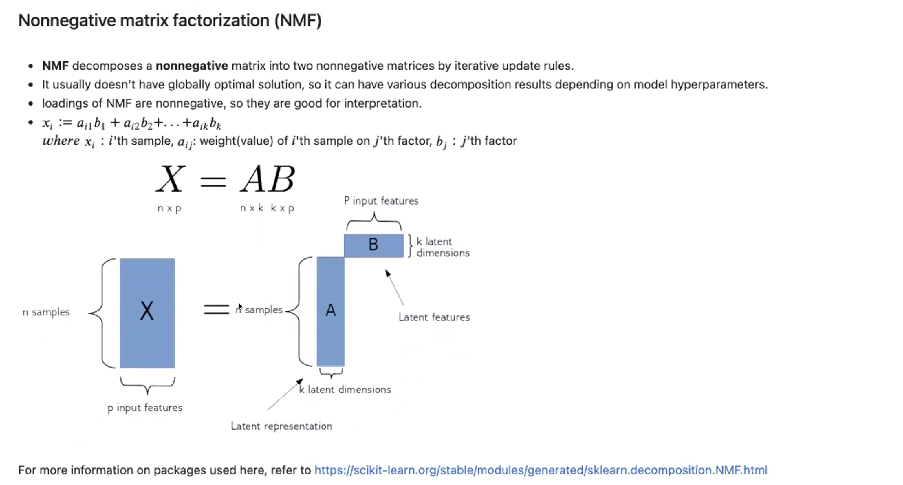

In [21]:
from sklearn.decomposition import NMF

In [22]:
# There are several methods to determine the number of components in NMF, but it is commonly chosen based on expert knowledge
n_components = 5
max_iter = 5000
solver = 'cd'
init = 'nndsvda'
nmf = NMF(n_components=n_components, solver=solver, random_state = seed, max_iter = max_iter)
nmf.fit(data)

C:\Users\Aga\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(max_iter=5000, n_components=5, random_state=0)

In [23]:
A = nmf.fit_transform(data)
B = nmf.components_

C:\Users\Aga\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [24]:
A.shape, B.shape

((191, 5), (5, 21))

In [25]:
pd.DataFrame(B.T, index = data.columns, columns = [f'factor_{i + 1}' for i in range(n_components)])

,factor_1,factor_2,factor_3,factor_4,factor_5
C1,2.090742,2.153172,2.736393,0.000000,3.042273
C2,1.156168,2.963889,2.036228,0.743563,3.551149
C3,0.924202,3.454423,1.557431,0.393907,5.193785
E1,1.535198,1.682891,0.839452,4.466979,0.963566
E2,0.000000,0.165645,0.306138,9.080599,0.908507
E3,3.820908,2.056316,0.000000,3.777227,0.000000
P1,0.246206,0.754894,0.086599,2.643064,12.931661
P2,0.000000,0.567229,0.000000,3.152595,13.567969
R1,0.076154,1.454010,5.060617,1.017744,0.000000
R2,0.000000,1.524466,4.258572,0.000000,4.062706


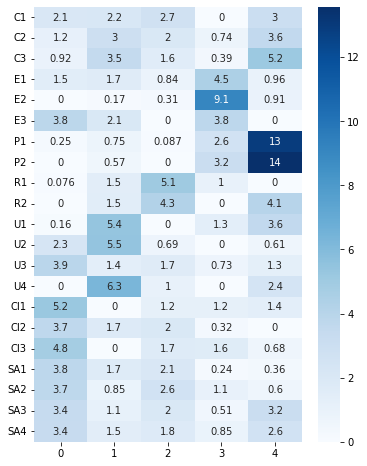

In [26]:
labels = B.T
plt.figure(figsize= (6,8))
sns.heatmap(B.T, annot=labels, cmap ='Blues')
plt.yticks(np.arange(len(data.columns)) + 0.5, data.columns, rotation = 0)
plt.show()

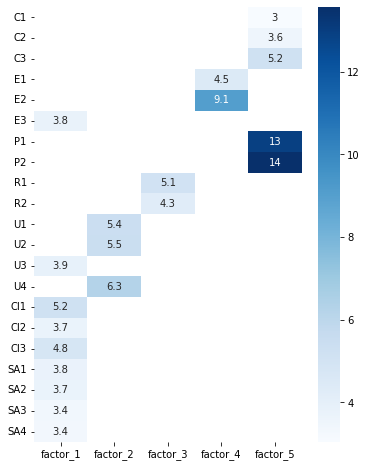

In [27]:
graph(B.T, n_components)

**It seems that NMF produces interpretable latent vectors since predefined categories are well seperated here (we assume that CI1-CI2 and SA1-SA4 being in the same category "satisfaction" is okay). However, the fact that factor_5 encompasses C1-C3 and P1-P2 seems a bit strange.**

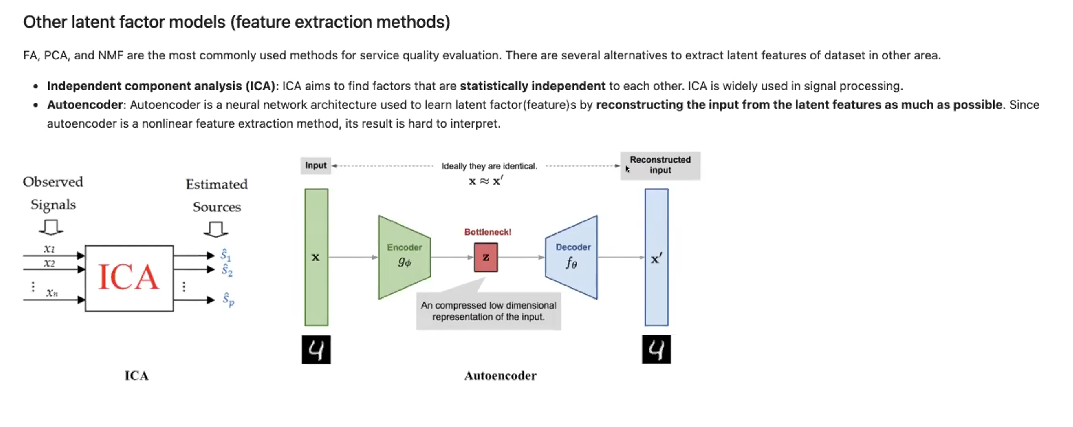